<a href="https://colab.research.google.com/github/raleight1/Forecasting-Nonseasonal-and-Seasonal/blob/main/Seasonal_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Milestone 1**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
data = 'AMD Monthly Historical Data(Sheet1).csv'

df = pd.read_csv(data)
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,28-Feb-25,109.54,NaN,NaN,NaN,NaN,NaN
1,31-Jan-25,99.86,NaN,NaN,NaN,NaN,NaN
2,31-Dec-24,115.95,NaN,NaN,NaN,NaN,NaN
3,30-Nov-24,120.79,NaN,NaN,NaN,NaN,NaN
4,31-Oct-24,137.18,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.iloc[:,0:2]
df.head()

,Date,Price
0,2025-02-28,109.54
1,2025-01-31,99.86
2,2024-12-31,115.95
3,2024-11-30,120.79
4,2024-10-31,137.18


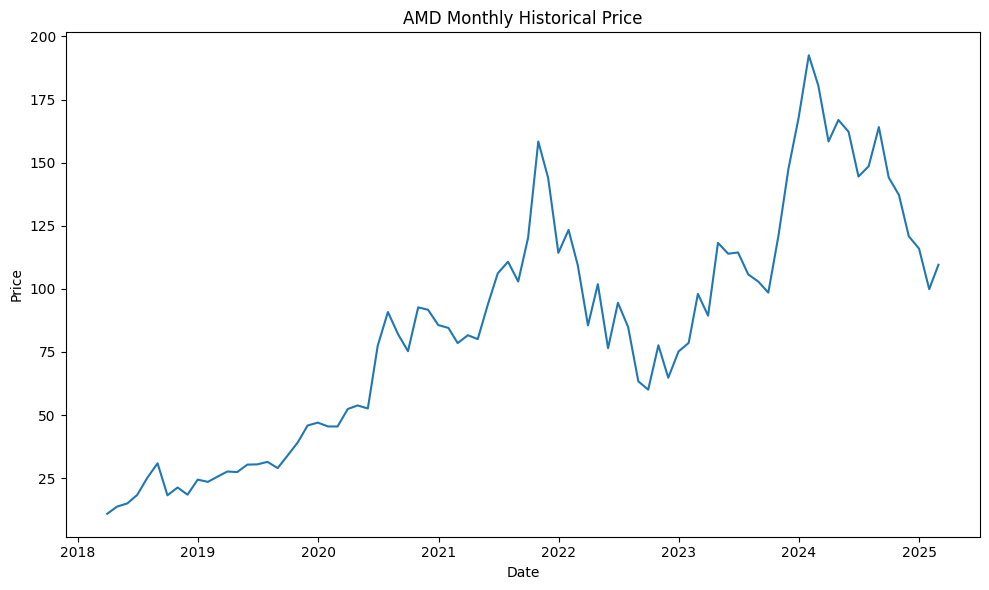

In [8]:
# Create the timeseries plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMD Monthly Historical Price')
plt.tight_layout()
plt.show()


**Milestone 2**

In [12]:
ad_fuller_result = adfuller(df['Price'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.8498022030570822
p-value: 0.8040537586961589


In [15]:
df_diff = np.diff(df['Price'])